In [1]:
#Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK resources
# Uncomment these lines for first-time use
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
# Step 1: Load the dataset
def load_dataset(filepath):
    """
    Load the hate speech dataset
    """
    df = pd.read_csv(filepath)
    print(f"Dataset loaded with shape: {df.shape}")
    return df

In [4]:
# Step 2: Exploratory Data Analysis
def explore_data(df):
    """
    Perform exploratory data analysis on the dataset
    """
    # Basic information
    print("\n=== Dataset Information ===")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\nColumn names:")
    print(df.columns.tolist())

    # Check for missing values
    missing_values = df.isnull().sum()
    print("\nMissing values:")
    print(missing_values)

    # Class distribution
    print("\nClass distribution:")
    class_counts = df['class'].value_counts().sort_index()
    print(class_counts)
    class_percentages = df['class'].value_counts(normalize=True).sort_index() * 100
    print("\nClass percentages:")
    print(class_percentages)

    # Map class numbers to labels for clarity
    class_mapping = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}
    df['class_label'] = df['class'].map(class_mapping)

    # Display sample tweets from each class
    print("\nSample tweets from each class:")
    for class_num, class_name in class_mapping.items():
        samples = df[df['class'] == class_num]['tweet'].head(2).tolist()
        print(f"\nClass {class_num} ({class_name}):")
        for i, sample in enumerate(samples, 1):
            print(f"{i}. {sample}")

    # Tweet length distribution
    df['tweet_length'] = df['tweet'].apply(len)
    print("\nTweet length statistics:")
    print(df['tweet_length'].describe())

    return df


In [5]:

# Step 3: Data Visualization
def visualize_data(df):
    """
    Create visualizations of the dataset
    """
    # Set up the aesthetics for plots
    sns.set(style='whitegrid')
    plt.rcParams.update({'font.size': 12})

    # Plot 1: Class Distribution
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='class_label', data=df, palette='viridis')
    plt.title('Distribution of Tweet Classes', fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Add count labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'bottom',
                   fontsize=12)

    plt.tight_layout()
    plt.savefig('/content/drive/My Drive/SMM/Images/Data_ingestion/class_distribution.png')
    plt.show()
    plt.close()

    # Plot 2: Tweet Length Distribution by Class
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='class_label', y='tweet_length', data=df, palette='viridis')
    plt.title('Tweet Length Distribution by Class', fontsize=16)
    plt.savefig('/content/drive/My Drive/SMM/Images/Data_ingestion/tweet_length_by_class.png')
    plt.show()
    return df


In [6]:
# Step 4: Text Preprocessing
def clean_text(text):
    """
    Clean and normalize text data
    """
    # Convert to lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove user mentions and RT
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'rt[\s]+', '', text)

    # Remove hashtags (keep the content after #)
    text = re.sub(r'#(\w+)', r'\1', text)

    # Remove HTML codes and entities
    text = re.sub(r'&amp;|&lt;|&gt;|&#\d+;', '', text)

    # Remove punctuations and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize_and_lemmatize(text, remove_stopwords=True):
    """
    Tokenize text and apply lemmatization
    """
    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords (optional)
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token.lower() not in stop_words]

    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return lemmatized_tokens




In [7]:
def preprocess_tweets(df, remove_stopwords=True):
    """
    Apply full preprocessing pipeline to tweets
    """
    print("\nPreprocessing tweets...")

    # Clean text
    df['cleaned_tweet'] = df['tweet'].apply(clean_text)

    # Tokenize and lemmatize
    df['tokens'] = df['cleaned_tweet'].apply(lambda x: tokenize_and_lemmatize(x, remove_stopwords))

    # Join tokens back into text for further processing
    df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))

    # Display preprocessing results for a sample tweet
    print("\nPreprocessing example:")
    sample_idx = np.random.randint(0, len(df))
    print(f"Original: {df.iloc[sample_idx]['tweet']}")
    print(f"Cleaned: {df.iloc[sample_idx]['cleaned_tweet']}")
    print(f"Processed: {df.iloc[sample_idx]['processed_text']}")

    return df

Dataset loaded with shape: (24783, 7)

=== Dataset Information ===
Number of rows: 24783
Number of columns: 7

Column names:
['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet']

Missing values:
Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

Class distribution:
class
0     1430
1    19190
2     4163
Name: count, dtype: int64

Class percentages:
class
0     5.770084
1    77.432111
2    16.797805
Name: proportion, dtype: float64

Sample tweets from each class:

Class 0 (Hate Speech):
1. "@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer" gaywad
2. "@CB_Baby24: @white_thunduh alsarabsss" hes a beaner smh you can tell hes a mexican

Class 1 (Offensive Language):
1. !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2. !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck

<ipython-input-5-e4f9870c0969>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class_label', data=df, palette='viridis')


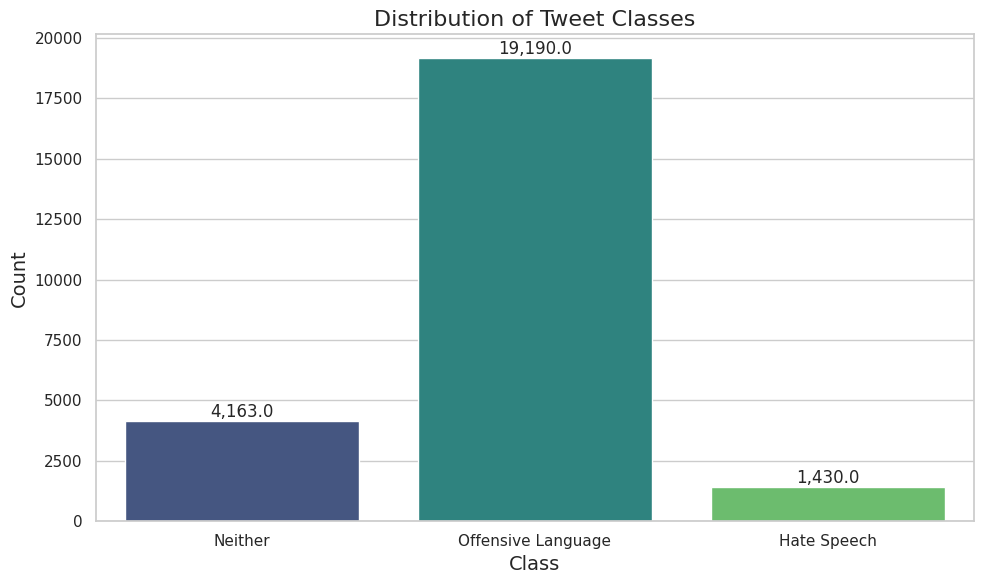

<ipython-input-5-e4f9870c0969>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_label', y='tweet_length', data=df, palette='viridis')


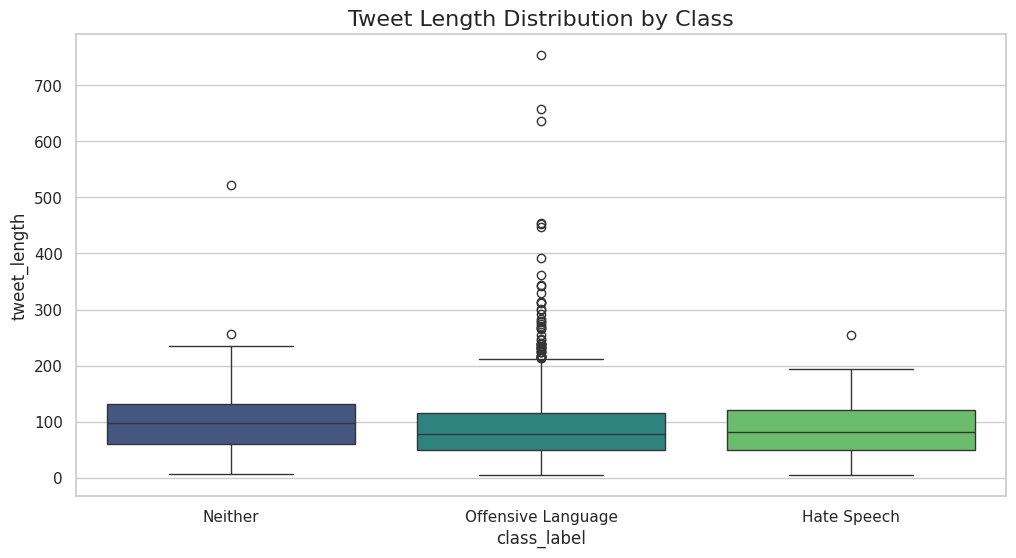


Preprocessing tweets...

Preprocessing example:
Original: @AmericanWhiteHM I hate that nigger.
Cleaned: i hate that nigger
Processed: hate nigger

Preprocessed data saved to 'preprocessed_data.csv'

Data exploration and preprocessing completed successfully!


In [8]:
# Main function to run the entire pipeline
def main():
    # Set the file path
    file_path = '/content/drive/My Drive/SMM/csv_files/labeled_data.csv'

    # Step 1: Load the dataset
    df = load_dataset(file_path)

    # Step 2: Exploratory Data Analysis
    df = explore_data(df)

    # Step 3: Data Visualization
    df = visualize_data(df)

    # Step 4: Text Preprocessing
    df = preprocess_tweets(df, remove_stopwords=True)

    # Save preprocessed data
    df.to_csv('/content/drive/My Drive/SMM/csv_files/preprocessed_data.csv', index=False)
    print("\nPreprocessed data saved to 'preprocessed_data.csv'")

    print("\nData exploration and preprocessing completed successfully!")

if __name__ == "__main__":
    main()